In [138]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from umap import UMAP
import warnings
import random
warnings.filterwarnings("ignore")

random.seed(1000)


path = "/Users/hanfeizi/Downloads"
file_name = "champions_group_data.csv"
fp = f"{path}/champions_group_data.csv"

df = pd.read_csv(f"{path}/{file_name}")

print("Path to dataset files:", path)

Path to dataset files: /Users/hanfeizi/Downloads


In [139]:
df = pd.read_csv(fp, sep=",", engine="python", encoding="utf-8-sig")
print(df.shape)
df.head()

(8559, 72)


,DUNS Number,Company Sites,Website,Address Line 1,City,State,State Or Province Abbreviation,Postal Code,Country,Phone Number,...,ISIC Rev 4 Code,ISIC Rev 4 Description,IT Budget,IT spend,No. of PC,No. of Desktops,No. of Laptops,No. of Routers,No. of Servers,No. of Storage Devices
0,639677726,"Zyf Lopsking Material Technology Co., Ltd. No....",NaN,"No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215000.0,CHINA,NaN,...,4662.0,Wholesale of metals and metal ores,0,0,1 to 10,1 to 10,1 to 10,1 to 10,NaN,NaN
1,547756179,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",NaN,"No.306, Building 8, Shuangyushudongli Jia, Hai...",Beijing,Beijing,BJ,100086.0,CHINA,1.082129e+09,...,NaN,NaN,5601,3472,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
2,728834216,Keshan Shengren Potato Industry Processing Co....,NaN,"South of Siduan Road, Xi Street, Keshan Town, ...",Qiqihar,Heilongjiang,HL,161000.0,CHINA,NaN,...,NaN,NaN,86905,53881,11 to 50,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
3,728791839,Zuoquan County Yuanfeng Agriculture Technology...,NaN,"Songaoliang Village, Liaoyang Town, Zuoquan Co...",Jinzhong,Shanxi,SX,30600.0,CHINA,NaN,...,NaN,NaN,11630,7210,NaN,NaN,NaN,NaN,NaN,NaN
4,728889244,Zuoquan County Tianxin Real Estate Development...,NaN,"No.14, Chengyadao Alley, Zuoquan County ...",Jinzhong,Shanxi,SX,30600.0,CHINA,3.548653e+09,...,NaN,NaN,94564,58629,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10


In [140]:
df.shape
df.info()

print("Shape:", df.shape) 
industry_cols = [
    'SIC Code', 'SIC Description',
    'NAICS Code', 'NAICS Description',
    'NACE Rev 2 Code', 'NACE Rev 2 Description',
    'ANZSIC Code', 'ANZSIC Description',
    'ISIC Rev 4 Code', 'ISIC Rev 4 Description'
]

geo_cols = [
    'Country', 'Region',
    'City', 'State', 'State Or Province Abbreviation', 'Postal Code'
]

firm_cols = [
    'Entity Type',
    'Ownership Type',
    'Company Status (Active/Inactive)',
    'Legal Status',
    'Manufacturing Status',
    'Is Headquarters',
    'Is Domestic Ultimate',
    'Company Sites'
]
df[industry_cols + geo_cols + firm_cols].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 72 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   DUNS Number                            8559 non-null   int64  
 1   Company Sites                          8559 non-null   object 
 2   Website                                625 non-null    object 
 3   Address Line 1                         8216 non-null   object 
 4   City                                   8045 non-null   object 
 5   State                                  8044 non-null   object 
 6   State Or Province Abbreviation         7824 non-null   object 
 7   Postal Code                            8062 non-null   float64
 8   Country                                8559 non-null   object 
 9   Phone Number                           1674 non-null   float64
 10  Region                                 8559 non-null   object 
 11  Enti

,SIC Code,SIC Description,NAICS Code,NAICS Description,NACE Rev 2 Code,NACE Rev 2 Description,ANZSIC Code,ANZSIC Description,ISIC Rev 4 Code,ISIC Rev 4 Description,...,State Or Province Abbreviation,Postal Code,Entity Type,Ownership Type,Company Status (Active/Inactive),Legal Status,Manufacturing Status,Is Headquarters,Is Domestic Ultimate,Company Sites
0,5051,Metals service center,423510.0,Metal Service Centers and Other Metal Merchant...,4672.0,Wholesale of metals and metal ores,3322.0,Metal and Mineral Wholesaling,4662.0,Wholesale of metals and metal ores,...,JS,215000.0,Branch,Private,Active,3.0,NaN,0.0,0.0,"Zyf Lopsking Material Technology Co., Ltd. No...."
1,5651,Ret family clothing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BJ,100086.0,Subsidiary,Private,Active,3.0,NaN,NaN,NaN,"Beijing Kaishi Lide Commerce And Trade Co., Lt..."
2,2037,Mfg frozen fruits/vegetables,311411.0,"Frozen Fruit, Juice, and Vegetable Manufacturing",NaN,NaN,NaN,NaN,NaN,NaN,...,HL,161000.0,Subsidiary,Private,Active,3.0,Yes,NaN,NaN,Keshan Shengren Potato Industry Processing Co....
3,191,General crop farm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SX,30600.0,Parent,Private,Active,3.0,NaN,NaN,NaN,Zuoquan County Yuanfeng Agriculture Technology...
4,6552,Subdivider/developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SX,30600.0,Parent,Private,Active,3.0,NaN,NaN,NaN,Zuoquan County Tianxin Real Estate Development...


In [141]:
df = df[df["Company Status (Active/Inactive)"] == "Active"].copy()
print("After filtering active companies:", df.shape)

After filtering active companies: (8559, 72)


In [142]:
df_base = df.copy()

df_active = df_base[df_base["Company Status (Active/Inactive)"].astype(str).str.strip() == "Active"].copy()

industry_col = "ISIC Rev 4 Description"
df_industry = df_base[df_base[industry_col].notna()].copy()

df_industry_active = df_active[df_active[industry_col].notna()].copy()

print("df_base:", df_base.shape)
print("df_active:", df_active.shape)
print("df_industry:", df_industry.shape)
print("df_industry_active:", df_industry_active.shape)


df_base: (8559, 72)
df_active: (8559, 72)
df_industry: (1514, 72)
df_industry_active: (1514, 72)


In [143]:
#industry cleaning
df_industry[industry_col] = (
    df_industry[industry_col]
    .astype("string")
    .str.strip()
)

In [144]:
#ownertype cleaning
df_active["Ownership_Type_Clean"] = (
    df_active["Ownership Type"]
    .astype("string")
    .str.strip()
    .fillna("Unknown")
)

df_active["Ownership_Type_Clean"].value_counts()

Ownership_Type_Clean
Private           7457
Unknown           1082
Nonprofit            8
Partnership          7
Public Sector        4
Non-Corporates       1
Name: count, dtype: Int64

In [145]:
#region and country cleaning
for d in [df_active, df_industry]:
    d["Country_Clean"] = (
        d["Global Ultimate Country Name"]
        .astype("string")
        .str.strip()
        .fillna("Unknown")
    )
    d["Region_Clean"] = (
        d["Region"]
        .astype("string")
        .str.strip()
        .fillna("Unknown")
    )

In [146]:
def map_major6_sic_code(code):
    try:
        code = int(code)
    except:
        return "Public / Social Services & Other"

    # Manufacturing & Industrial
    if (100 <= code <= 1499) or (2000 <= code <= 3999):
        return "Manufacturing & Industrial"

    # Construction & Real Estate
    if (1500 <= code <= 1799) or (6500 <= code <= 6799):
        return "Construction & Real Estate"

    # Retail & Consumer Services
    if (5000 <= code <= 5199) or (5200 <= code <= 5999) or (5800 <= code <= 5899) or (4100 <= code <= 4799):
        return "Retail & Consumer Services"

    # ICT & Digital Services
    if (4800 <= code <= 4899):
        return "ICT & Digital Services"

    # Professional & Business Services
    if (6000 <= code <= 6499) or (7000 <= code <= 7399) or (8700 <= code <= 8799):
        return "Professional & Business Services"

    # Public / Social Services & Other
    if (8000 <= code <= 8999) or (code >= 9000):
        return "Public / Social Services & Other"

    return "Public / Social Services & Other"
df_active["Industry_Major6_SIC_Code"] = df_active["SIC Code"].apply(map_major6_sic_code)
df_active["Industry_Major6_SIC_Code"].value_counts()


Industry_Major6_SIC_Code
Professional & Business Services    2628
Retail & Consumer Services          2417
Construction & Real Estate          1501
Public / Social Services & Other     973
Manufacturing & Industrial           931
ICT & Digital Services               109
Name: count, dtype: int64

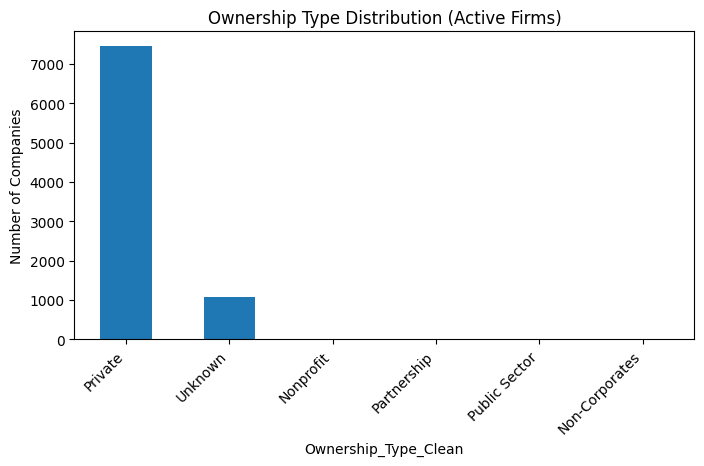

In [147]:
ownership_counts = df_active["Ownership_Type_Clean"].value_counts()

plt.figure(figsize=(8,4))
ownership_counts.plot(kind="bar")
plt.title("Ownership Type Distribution (Active Firms)")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

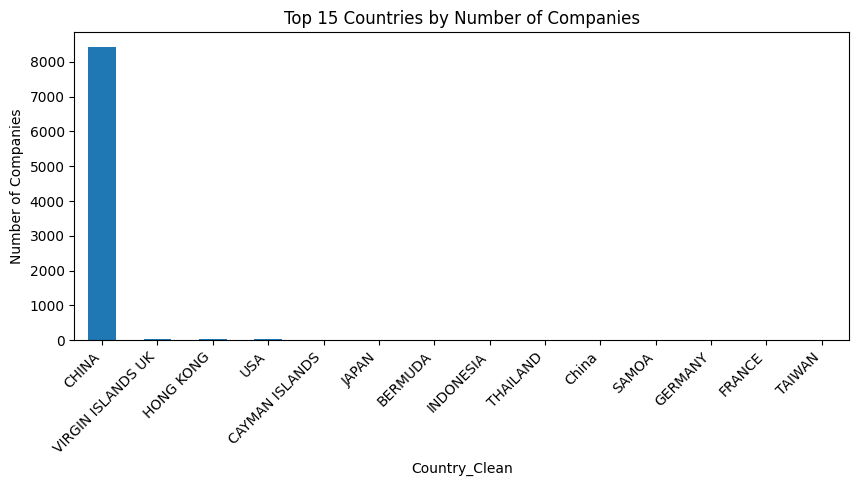

In [148]:
#region eda
country_counts = df_active["Country_Clean"].value_counts().head(15)
df_active["Country_Clean"] = df_active["Country"].astype("string").str.strip().str.upper()

df_active["Region_Binary"] = np.where(
    df_active["Country_Clean"] == "CHINA",
    "China",
    "Non-China"
)

plt.figure(figsize=(10,4))
country_counts.plot(kind="bar")
plt.title("Top 15 Countries by Number of Companies")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

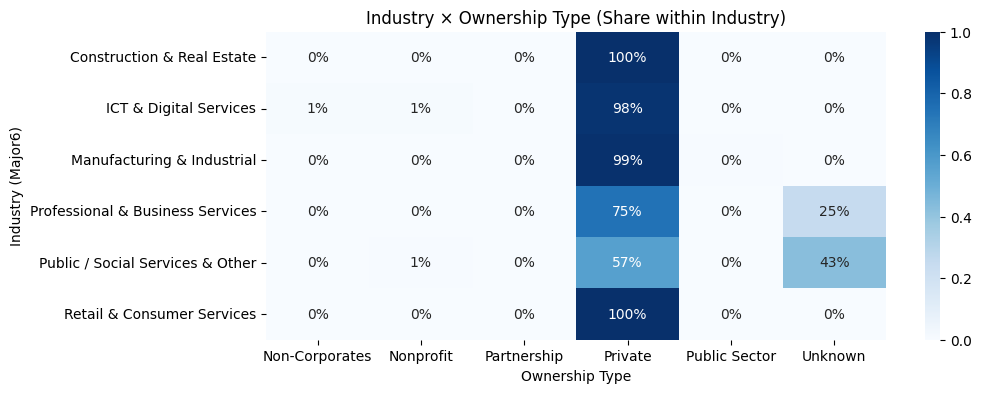

In [149]:
industry_ownership = pd.crosstab(
    df_active["Industry_Major6_SIC_Code"],
    df_active["Ownership_Type_Clean"],
    normalize="index"
)

industry_ownership
plt.figure(figsize=(10,4))
sns.heatmap(
    industry_ownership,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Industry × Ownership Type (Share within Industry)")
plt.ylabel("Industry (Major6)")
plt.xlabel("Ownership Type")
plt.show()

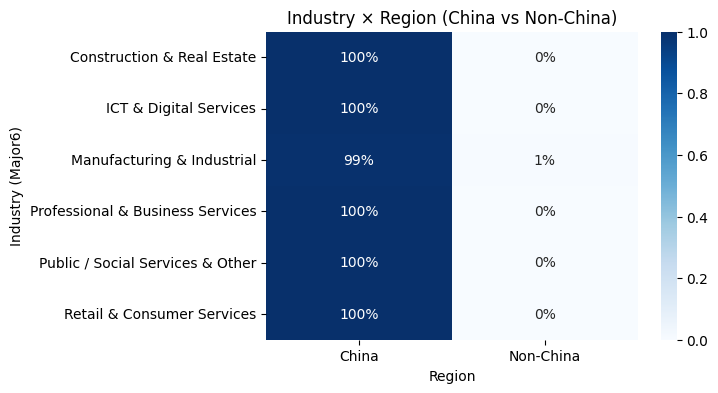

In [150]:
industry_region = pd.crosstab(
    df_active["Industry_Major6_SIC_Code"],
    df_active["Region_Binary"],
    normalize="index"
)

industry_region
plt.figure(figsize=(6,4))
sns.heatmap(
    industry_region,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Industry × Region (China vs Non-China)")
plt.ylabel("Industry (Major6)")
plt.xlabel("Region")
plt.show()

In [151]:
import prince
import pandas as pd
import numpy as np

mca_cols = ["Industry_Major6_SIC_Code", "Ownership_Type_Clean", "Region_Binary"]

df_mca = df_active[mca_cols].copy()


for c in mca_cols:
    df_mca[c] = (
        df_mca[c]
        .astype(str)        
        .str.strip()
        .replace({"nan": "Missing", "None": "Missing", "": "Missing"})
    )
df_mca = df_mca.astype(object)

mca = prince.MCA(n_components=3, random_state=42)

mca_coords = mca.fit_transform(df_mca)
mca_coords.columns = ["Dim1", "Dim2", "Dim3"]

mca_coords.head()



,Dim1,Dim2,Dim3
0,-0.485428,-0.049951,-0.019925
1,-0.485428,-0.049951,-0.019925
2,-0.483825,0.352128,-0.411238
3,-0.483825,0.352128,-0.411238
4,-0.483908,-0.071527,-0.008972


In [152]:
mca_coords.head()
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df_active["MCA_Cluster"] = kmeans.fit_predict(mca_coords)

df_active["MCA_Cluster"].value_counts()

MCA_Cluster
0    4837
2    2623
1    1080
3      18
4       1
Name: count, dtype: int64

In [153]:
profile = (
    df_active.assign(MCA_Cluster=df_active["MCA_Cluster"])
      .groupby("MCA_Cluster")[mca_cols]
      .apply(lambda g: {
          "Industry_top": g["Industry_Major6_SIC_Code"].value_counts().head(3).to_dict(),
          "Ownership_top": g["Ownership_Type_Clean"].value_counts().head(3).to_dict(),
          "Region_top": g["Region_Binary"].value_counts().to_dict(),
          "n": len(g)
      })
)

profile

MCA_Cluster
0    {'Industry_top': {'Retail & Consumer Services'...
1    {'Industry_top': {'Professional & Business Ser...
2    {'Industry_top': {'Professional & Business Ser...
3    {'Industry_top': {'Public / Social Services & ...
4    {'Industry_top': {'ICT & Digital Services': 1}...
dtype: object

In [154]:
print(df_mca.dtypes)
print(df_mca.head(3))
print(df_mca.applymap(type).head(3))

Industry_Major6_SIC_Code    object
Ownership_Type_Clean        object
Region_Binary               object
dtype: object
     Industry_Major6_SIC_Code Ownership_Type_Clean Region_Binary
0  Retail & Consumer Services              Private         China
1  Retail & Consumer Services              Private         China
2  Manufacturing & Industrial              Private         China
  Industry_Major6_SIC_Code Ownership_Type_Clean  Region_Binary
0            <class 'str'>        <class 'str'>  <class 'str'>
1            <class 'str'>        <class 'str'>  <class 'str'>
2            <class 'str'>        <class 'str'>  <class 'str'>


In [155]:
mca_cols = ["Industry_Major6_SIC_Code", "Ownership_Type_Clean", "Region_Binary"]

def top_share(s, k=3):
    vc = s.value_counts(normalize=True).head(k)
    return {idx: f"{val:.0%}" for idx, val in vc.items()}

cluster_profile = (
    df_active.groupby("MCA_Cluster")[mca_cols]
      .agg(lambda s: top_share(s, k=3))
)

cluster_sizes = df_active["MCA_Cluster"].value_counts().sort_index()
cluster_profile["n"] = cluster_sizes

cluster_profile

,Industry_Major6_SIC_Code,Ownership_Type_Clean,Region_Binary,n
MCA_Cluster,,,,
0,"{'Retail & Consumer Services': '50%', 'Constru...","{'Private': '100%', 'Public Sector': '0%'}",{'China': '100%'},4837
1,"{'Professional & Business Services': '62%', 'P...","{'Unknown': '100%', 'Partnership': '0%'}",{'China': '100%'},1080
2,"{'Professional & Business Services': '75%', 'P...","{'Private': '100%', 'Partnership': '0%', 'Unkn...",{'China': '100%'},2623
3,"{'Public / Social Services & Other': '44%', 'M...","{'Nonprofit': '44%', 'Private': '44%', 'Unknow...","{'Non-China': '61%', 'China': '39%'}",18
4,{'ICT & Digital Services': '100%'},{'Non-Corporates': '100%'},{'China': '100%'},1


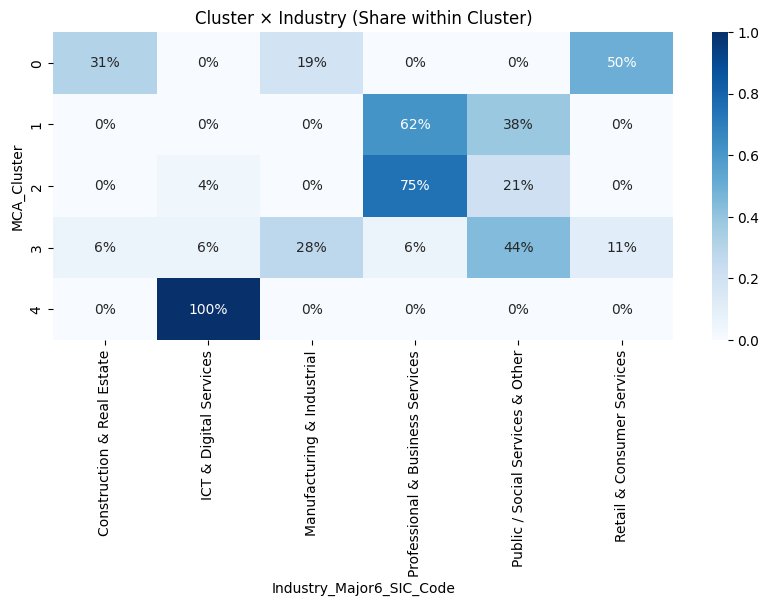

In [156]:
ct_ind = pd.crosstab(df_active["MCA_Cluster"], df_active["Industry_Major6_SIC_Code"], normalize="index")

plt.figure(figsize=(10,4))
sns.heatmap(ct_ind, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cluster × Industry (Share within Cluster)")
plt.xlabel("Industry_Major6_SIC_Code")
plt.ylabel("MCA_Cluster")
plt.show()

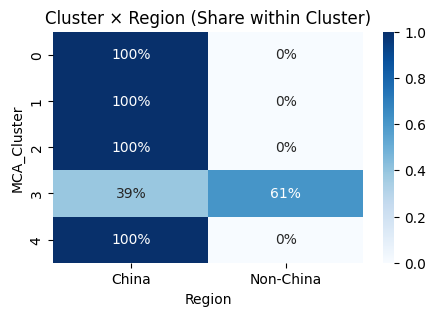

In [157]:
ct_reg = pd.crosstab(df_active["MCA_Cluster"], df_active["Region_Binary"], normalize="index")

plt.figure(figsize=(5,3))
sns.heatmap(ct_reg, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cluster × Region (Share within Cluster)")
plt.xlabel("Region")
plt.ylabel("MCA_Cluster")
plt.show()